In [1]:
import pandas as pd

In [2]:

#  'data-sell4all.xlsx' 
file_path = 'data-sell4all.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Convert the DataFrame to a CSV file
csv_file_path = 'data-sell4all.csv'  
df.to_csv(csv_file_path, index=False)

# Partie 1

In [3]:
# Lire le fichier CSV
df = pd.read_csv('data-sell4all.csv')


In [4]:
# Afficher les 5 premières lignes du DataFrame
print(df.head())

      Pays  Age    Genre Dépenses des clients
0   France    32  Female               150.50
1  Germany    45    Male               200.75
2    Spain    28  Female                75.25
3    Italy    39    Male               180.00
4       UK    52  Female               250.30


In [7]:
# Afficher un résumé technique des données
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None


## Expliquer les détails affichés :

**Nombre de lignes :** Montre combien d'enregistrements (utilisateurs) sont présents. <br>
**Colonnes :** Liste les noms des colonnes, qui correspondent aux attributs de chaque utilisateur.<br>
**Types de données :** Indique le type de données de chaque colonne (ex. int64 pour des entiers, float64 pour des nombres décimaux, object pour des chaînes de caractères).

In [9]:
print(df.columns)


Index(['Pays', ' Age ', 'Genre', 'Dépenses des clients'], dtype='object')


In [11]:
df[' Age ']

0                32
1                45
2                28
3                39
4                52
          ...      
60              NaN
61                ∞
62              NaN
63            25;30
64    Not Available
Name:  Age , Length: 65, dtype: object

In [16]:
# Nettoyer la colonne "Age"
df[' Age '] = pd.to_numeric(df[' Age '], errors='coerce')  # Convertir en numérique, les erreurs seront remplacées par NaN

# Supprimer les lignes où l'âge est manquant ou invalide
df = df.dropna(subset=[' Age '])

# Nettoyer la colonne "Dépenses des clients"
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')

# Supprimer les lignes où les dépenses des clients sont manquantes ou invalides
df = df.dropna(subset=['Dépenses des clients'])


# Recalculer la médiane et la moyenne après le nettoyage
median_age = df[' Age '].median()
median_spending = df['Dépenses des clients'].median()

mean_age = df[' Age '].mean()
mean_spending = df['Dépenses des clients'].mean()

print(f'Médiane de l\'âge: {median_age}')
print(f'Médiane des dépenses des clients: {median_spending}')
print(f'Moyenne de l\'âge: {mean_age}')
print(f'Moyenne des dépenses des clients: {mean_spending}')


Médiane de l'âge: 36.5
Médiane des dépenses des clients: 167.5
Moyenne de l'âge: 54.232142857142854
Moyenne des dépenses des clients: 18014.616964285717


# Partie 2

## Créer une visualisation des données du graphique à barres qui montre les dépenses des clients par pays :

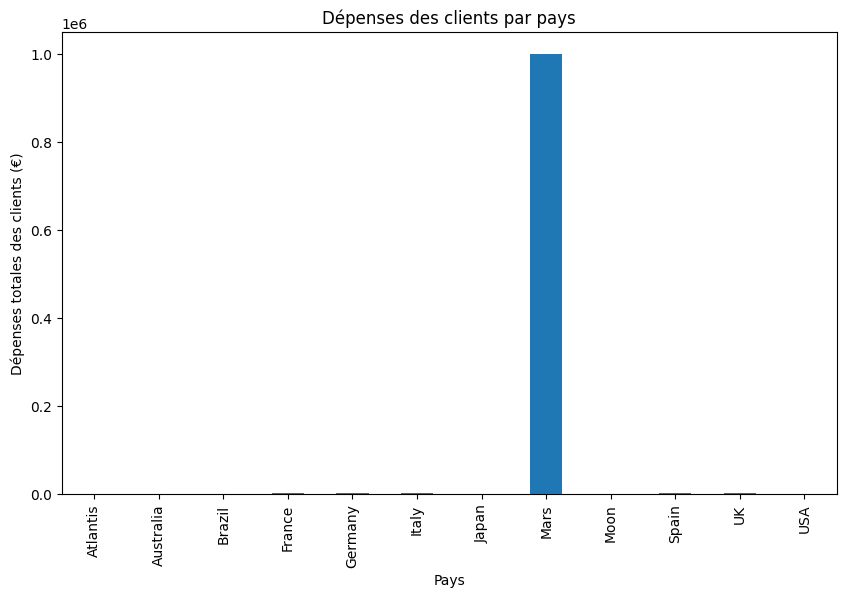

In [17]:
import matplotlib.pyplot as plt

# Calculer les dépenses totales par pays
spending_by_country = df.groupby('Pays')['Dépenses des clients'].sum()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
spending_by_country.plot(kind='bar')
plt.title('Dépenses des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Dépenses totales des clients (€)')
plt.show()


## Nettoyer les lignes avec moins de 10 € de dépenses client :

In [18]:
# Supprimer les lignes avec des dépenses client inférieures à 10 €
df = df[df['Dépenses des clients'] >= 10]


##  Nettoyer les doublons :

In [19]:
# Supprimer les doublons
df = df.drop_duplicates()


## Écrire les données nettoyées dans un nouveau fichier CSV :

In [21]:
# Écrire les données nettoyées dans un nouveau fichier CSV
df[['Pays', ' Age ', 'Genre', 'Dépenses des clients']].to_csv('data-sell4all-cleaned.csv', index=False)
